In [0]:
import pandas as pd
import numpy as np
import io

from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import TheilSenRegressor, LinearRegression, RANSACRegressor

from sklearn.metrics import recall_score, precision_score
from mlxtend.plotting import plot_decision_regions

In [18]:
from google.colab import files
uploaded = files.upload()

stocks = pd.read_csv(io.BytesIO(uploaded['20microns.csv']))
print(stocks.head())

Saving 20microns.csv to 20microns (2).csv
   Unnamed: 0     SYMBOL SERIES  ...   TIMESTAMP  TOTALTRADES          ISIN
0           0  20MICRONS     EQ  ...  2017-06-28          202  INE144J01027
1           1  20MICRONS     EQ  ...  2017-11-28        14196  INE144J01027
2           2  20MICRONS     EQ  ...  2017-02-28          193  INE144J01027
3           3  20MICRONS     EQ  ...  2017-04-28          597  INE144J01027
4           4  20MICRONS     EQ  ...  2017-03-20          413  INE144J01027

[5 rows x 14 columns]


In [0]:
start16 = datetime(2016, 1, 1)
end16 = datetime(2016, 12, 31)
stamp16 = pd.date_range(start16, end16)

start17 = datetime(2017, 1, 1)
end17 = datetime(2017, 12, 31)
stamp17 = pd.date_range(start17, end17)

stocks['Date'] = pd.to_datetime(stocks.TIMESTAMP,format='%Y-%m-%d')
stocks.index = stocks['Date']

In [20]:
stocks = stocks[['OPEN', 'HIGH', 'LOW', 'CLOSE', 'TOTTRDQTY', 'Date', 'PREVCLOSE', 'TOTTRDVAL', 'TOTALTRADES']]
stocks['HL_PCT'] = (stocks['HIGH'] - stocks['LOW']) / stocks['LOW'] * 100.0
stocks.index = stocks['Date']

train = []
test = []
for index, rows in stocks.iterrows():
    if index in stamp16:
        train.append(list(rows))
    if index in stamp17:
        test.append(list(rows))

train = pd.DataFrame(train, columns = stocks.columns)
test = pd.DataFrame(test, columns = stocks.columns)

print(train.head())
print(test.head())

    OPEN   HIGH    LOW  CLOSE  ...  PREVCLOSE    TOTTRDVAL  TOTALTRADES     HL_PCT
0  33.90  35.00  32.25   33.0  ...      33.75   1593805.60          253   8.527132
1  32.30  33.70  31.80   32.7  ...      32.30    409528.50          149   5.974843
2  32.30  32.80  31.55   32.2  ...      32.00    930147.40          104   3.961965
3  27.55  28.50  26.90   27.3  ...      27.55   2283316.35          263   5.947955
4  38.50  40.75  36.80   38.6  ...      39.20  21912747.75         2267  10.733696

[5 rows x 10 columns]
    OPEN   HIGH    LOW  CLOSE  ...  PREVCLOSE     TOTTRDVAL  TOTALTRADES     HL_PCT
0  37.80  37.80  36.15  36.85  ...      37.05  9.946579e+05          202   4.564315
1  52.90  61.70  52.90  59.40  ...      52.80  1.481265e+08        14196  16.635161
2  36.15  36.30  35.60  36.05  ...      35.65  1.461975e+06          193   1.966292
3  44.35  44.80  43.55  43.90  ...      44.80  3.984352e+06          597   2.870264
4  36.00  36.75  34.20  34.90  ...      35.40  2.709788e+06

In [0]:
X_train = train[['HIGH', 'LOW', 'OPEN', 'TOTTRDQTY', 'TOTTRDVAL', 'TOTALTRADES']]
x_train = X_train.to_dict(orient='records')
vec = DictVectorizer()
X = vec.fit_transform(x_train).toarray()
Y = np.asarray(train.CLOSE)
Y = Y.astype('int')

In [0]:
X_test = test[['HIGH', 'LOW', 'OPEN', 'TOTTRDQTY', 'TOTTRDVAL', 'TOTALTRADES']]
x_test = X_test.to_dict(orient='records')
vec = DictVectorizer()
x = vec.fit_transform(x_test).toarray()
y = np.asarray(test.CLOSE)
y = y.astype('int')

In [25]:
clf = TheilSenRegressor()
clf.fit(X, Y) 
print("Accuracy of this statistical arbitrage model is : ",clf.score(x,y))
predict = clf.predict(x)

test['predict'] = predict

Accuracy of this statistical arbitrage model is :  0.9744563648609346


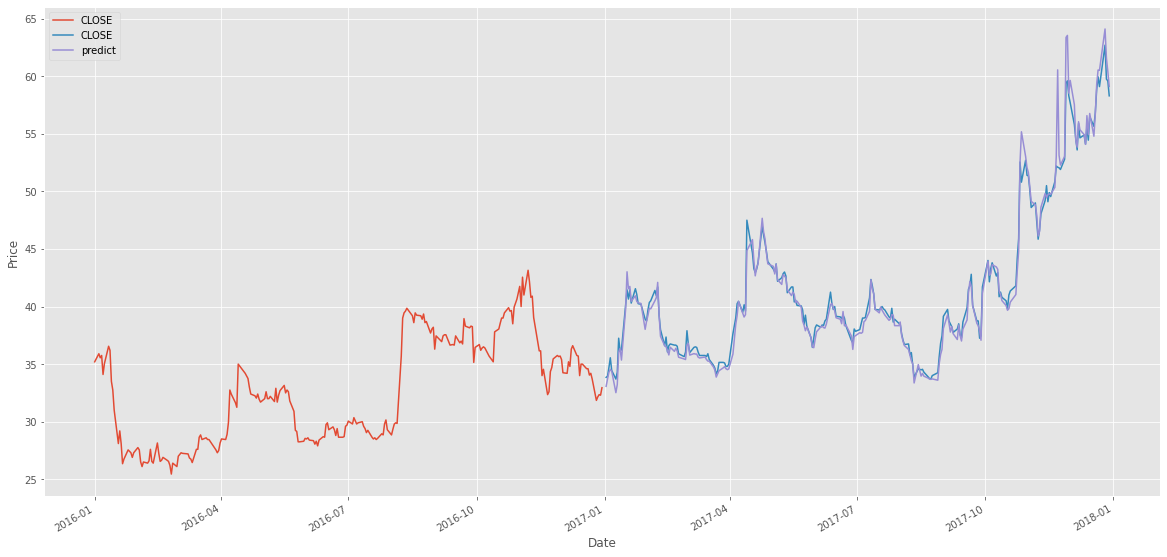

In [26]:
train.index = train.Date
test.index = test.Date
train['CLOSE'].plot()
test['CLOSE'].plot()
test['predict'].plot()
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()